# Lecture 3: Graphical Summaries and Intro to Data Wrangling 
***

In this notebook you'll apply some basic Pandas tools to perform graphical summaries on the Boulder Weather Data from Lecture 2.  Then we'll look at a dirty version of the Titanic data set and see if we can wrangle it into submission. 

First, as always, we'll load Numpy and Pandas using their common aliases, np and pd. 

In [ ]:
import numpy as np 
import pandas as pd

We also need to load Matplotlib's Pylab library and to set up Jupyter so that it will plot directly in the notebook.  

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

First, load the weather data into a Pandas DataFrame using read_csv( ).  Remember to change the file_path variable to point to the correct location. 

In [6]:
# Two different paths to the data 
local_path = 'data/clean_boulder_weather.csv'
web_path   = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/inclass-notebooks/data/clean_boulder_weather.csv'

# Select the path that works for you 
file_path = local_path 

# Load the data into a DataFrame 
dfW= pd.read_csv(file_path)

# Inspect some of the data
dfW.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0


Recall that the data has the following columns: 

- **STATION**: The unique identification code for each weather station 
- **NAME**: The location / name of the weather station 
- **DATE**: The date of the observation 
- **PRCP**: The precipitation (in inches)
- **TMAX**: The daily maximum temperature (in Fahrenheit)
- **TMIN**: The daily minimum temperature (in Fahrenheit)

And recall that the data set contains data from several weather stations.  Their names were

In [ ]:
station_names = list(set(dfW["NAME"]))
print("Station Names: ", station_names)

### Histograms of Maximum Temperature 

Suppose we want to draw a histogram of the **TMAX** characteristics over all weather stations.  There are several ways to plot histograms in Python.  We will use Pandas built-in histogram function because it is designed to handle missing data well, but Matplotlib has a [native hist( )](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) function that you can use if you prefer. Furthermore, the Pandas' hist( ) function actually calls the Matplotlib hist( ) function internally, so any parameters that work with Matplotlib's function should work with the Pandas function. 

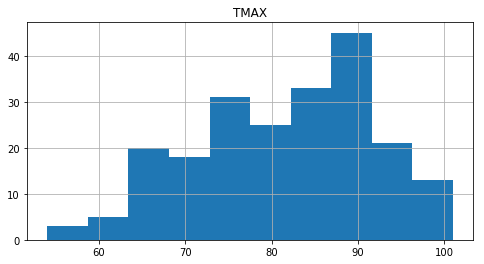

In [7]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="TMAX", ax=ax);

Here we've made a bare-bones histogram of the **TMAX** data using Pandas' hist( ) function.  Notice that we call the hist( ) function on the entire DataFrame and then indicate which column we want to use using the $\texttt{column}$ option.  Finally, we pass in the figure axis to the function so that we can make modifications to the layout later on. 

Pandas' automatic bin selection is usually pretty good, but if you want to define your own bins you can do so by passing in an optional $\texttt{bins}$ argument to hist( ).  The two options are to pass in an integer value for the number of bins you want _or_ a list specifying the bin edges. Suppose for example we want bins of width 5 starting at 50 and ending at 105.  We could do the following:  

In [ ]:
my_bins = range(50,110,5)
print("bin edges = ", list(my_bins))

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="TMAX", ax=ax, bins=my_bins);

We can also add loads of options to make the plot more appealing to the eye.  

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
dfW.hist(column="TMAX", ax=ax, bins=my_bins, facecolor="steelblue", edgecolor="white")

# Add a title
ax.set_title("Boulder County Max Temperatures", fontsize=20)

# Add axis labels 
ax.set_xlabel("Max Temperature (in Fahrenheit)", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


Finally, side-by-side or stacked histograms are a great way to compare two sets of data.  Let's create histograms of **TMAX** for data from two different weather stations and stack them on top of each other.  Note that in order to make a true comparison it's a good idea to set the range on the horizontal and vertical axes to be the same on both plots. For this experiment we'll use the data from the Niwot and Sugarloaf weather stations. 

NameError: name 'dfW' is not defined

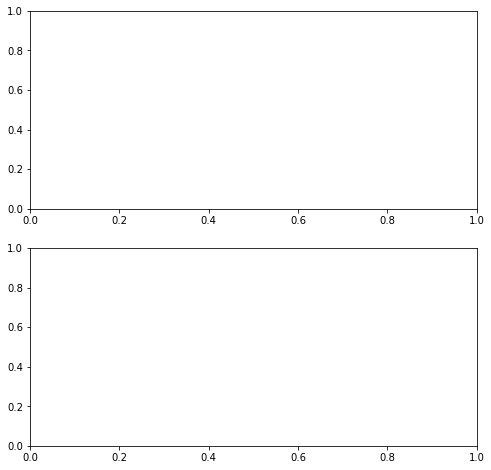

In [5]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Niwot on Top 
# --------------------------------------
dfW.loc[dfW["NAME"]=="NIWOT, CO US"].hist(column="TMAX", ax=axes[0], facecolor="steelblue", edgecolor="white")
                                                      
# Add titles and labels 
axes[0].set_title("Niwot Max Daily Temperatures", fontsize=20)
axes[0].set_xlabel("Max Temperature (in degrees F)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Sugarloaf on Bottom 
# --------------------------------------
dfW.loc[dfW["NAME"]=="SUGARLOAF COLORADO, CO US"].hist(column="TMAX", ax=axes[1], facecolor="green", edgecolor="white")
                                                      
# Add titles and labels 
axes[1].set_title("Sugarloaf Max Daily Temperatures", fontsize=20)
axes[1].set_xlabel("Max Temperature (in degrees F)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([50,95])
axes[1].set_xlim([50,95])
axes[0].set_ylim([0,9])
axes[1].set_ylim([0,9]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

Note that because we set the horizontal and vertical axis ranges to be the same we can easily make visual comparisons between the data.  For instance it is crystal clear that that it tends to be hotter in general in Sugarloaf than in Niwot. 

### Exercise 1
***
Make stacked histograms to compare the minimum temperatures at Ralston Resevoir and Gross Resevoir.  Play around with the different parameters until you find a style and color scheme that you like.  Don't forget to add meaningful titles and axis labels! 


After you've gotten some decent _Frequency_ histograms, pass the parameter **normed=True** into the hist( ) function and redo the plots.  Note that you'll probably have to change the vertical axis limits.  How does the **normed=True** parameter change the histograms? 

### Exercise 2  
***
Make stacked histograms to compare the maximum temperature over all of Boulder County on days when it rained vs days when it did not rain. 

### Box-and-Whisker Plots of Minimum Temperature 
***

Next we'll look at Pandas' box-and-whisker plot functionality using the boxplot( ) function.  We'll start by making a box-and-whisker plot for Niwot's minimum daily temperatures. Like the hist( ) function, boxplot( ) is called on the entire DataFrame, and then we specify which column we're interested in using the **column** parameter.  

In [ ]:
# Initialize figure 
fig = plt.figure(figsize=(6,6))

# Gat axis object 
ax = fig.add_subplot(111)

# Plot histogram 
dfW.loc[dfW["NAME"]=='GROSS RESERVOIR, CO US'].boxplot(column="TMIN", ax=ax);

Note that the result is a standard box-and-whiskers plot with a box spanning the distance between the lower and upper quartiles, a (barely perceptible) median line, whiskers and caps, and outliers that fall more than $1.5 \times IQR$ outside of the nearest quartile. 

Unfortunately, the default parameters don't lend themselves well to easy-to-read plots, so we'll make a few tweaks. 

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))


# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfW.loc[dfW["NAME"]=='GROSS RESERVOIR, CO US'].boxplot(column="TMIN", ax=ax, widths=[.25], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('GROSS RESERVOIR, CO US', fontsize=18)
ax.set_ylabel("Min Temperature (in degrees F)", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

Notice that the default settings for boxplot( ) gives us whiskers and outliers as described in lecture.  That is, the length of the whiskers are set equal to the largest distance between an observation and the upper or lower quartile that is less than $1.5 \times IQR$.  Any data point beyond this distance is drawn as an outlier (or a _flier_ as Pandas calls them).   

Box-and-whisker plots are great for visualizing the spread of the data, outliers, and skew of the data.  For instance, from this box-and-whisker plot we can tell that the minimum temperature at Gross Reservoir has a positive skew because the the upper quartile $Q_3$ is farther from the median than the lower quartile $Q_1$ is from the median. 

Box-and-whisker plots are especially useful for comparing multiple sets of observations.  For instance, the following side-by-side box-and-whisker plots compare the minimum temperature at Gross Reservoir and Ralston Reservoir. 

Note that the trick here is to select the rows of the DataFrame corresponding only to Gross Reservoir and Ralston Reservoir and then call boxplot( ) with the **by** parameter to break the data into the two sets based on the value of the **NAME** column.  

In [ ]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to Gross and Ralston reservoirs, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="NAME" to break the data into the two sets 
bp = dfW.loc[(dfW["NAME"]=='GROSS RESERVOIR, CO US') | (dfW["NAME"]=='RALSTON RESERVOIR, CO US')].boxplot(
    column=["TMIN"], by="NAME", ax=ax, widths=[.5, .5], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('GROSS vs. RALSTON RESERVOIRS', fontsize=18)
ax.set_ylabel("Min Temperature (in F)", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Gross", "Ralston"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

From the side-by-side box-and-whiskers plots we can easily see several things 

- the median min daily temperature at Ralston Reservoir is more than 10 degrees warmer than that at Gross Reservoir
- the min daily temperature at Gross Res is positively skewed, while the min daily temperature at Ralston Res is slightly negatively skewed 
- while the overall spreads of the two data sets are approximately equal, there is more variability in the middle 50% of the min daily temp at Gross Res than in the middle 50% of the min daily temp at Ralston Res

### Exercise 3
***

Plot side-by-side box and whisker plots of the max daily temperature in Niwot and Sugarloaf.  Comment on any similarities and differences that you see in the distributions of the data. 

### Exercise 4
***

Plot side-by-side box and whisker plots of the precipitation measured at **all** weather stations where we have precipitation data (**hint**: it's not all of them).  Mess with the plot parameters until you get a reasonable graphic that doesn't look too cramped.  Note that it might be helpful to make the figure much wider and rotate the horizontal labels 90 degrees. 

### Wrangling and Cleaning Data in Pandas
***

In this section we will explore some common Pandas functionality for cleaning and wrangling data.  We will explore a dirtied-up version of the Titanic data. First, load the data into a Pandas DataFrame called dfDirtyT using read_csv( ).  Remember to change the file_path variable to point to the correct location.  

In [ ]:
# Two different paths to the data 
local_path = 'data/dirty_titanic_data.csv'
web_path   = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/inclass-notebooks/data/dirty_titanic_data.csv'

# Select the path that works for you 
file_path = web_path

# Load the data into a DataFrame 
dfDirtyT = pd.read_csv(file_path)

# Inspect some of the data
dfDirtyT.head()

Recall that each row in the DataFrame refers to a particular passenger on the Titanic.  The columns of the DataFrame give you specific information about each passenger.  The **PassengerId** is simply a unique identifier given to each passenger in the data set.  The rest of the attributes are more meaningful: 

- **Survived**: Indicates whether the passenger survived the sinking
- **Pclass**: Indicates the socio-economic status of the passenger (lower number means higher class)
- **Name**: The passenger's name 
- **Sex**: The passenger's sex 
- **Age**: The passenger's age
- **SibSp**: The number of siblings / spouses the passenger was traveling with 
- **Parch**: The number of children / parents the passenger was traveling with 
- **Ticket**: The passenger's ticket number 
- **Fare**: How much the passenger paid for their ticket 
- **Embarked**: The passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

OK, first let's get the lay of the land.  It's almost guaranteed that in any real-world data set you're going to have some values that are simply missing.  Another common occurrence is that values that really should be of numerical type are loaded into Pandas as strings instead of ints or floats.  One way to check all of these things at once is using Pandas info( ) function on your DataFrame.  Let's try that now. 

In [ ]:
dfDirtyT.info()

From this we can see that there are 891 total rows in the DataFrame.  Furthermore, the info( ) function gives us a report about how many non-missing (non-null) values we have in each column.  For instance, it appears that each row in the DataFrame contains a valid **Name** entry, but only 861 rows have a valid **Survived** entry.  Other columns that are missing data are **Pclass**, **Age**, **Cabin** and **Embarked**. 

Finally, the last column of the report from info( ) tells us the data type of the non-missing entries.  Note that, as expected, **SibSp** and **Parch** are recorded as integers.  If a data type is reported as _object_ then this typically indicates a _string_ in Pandas.  

Do any of the columns have data types that are contrary to what you would expect? 

How about **Age** and **Fare**? We would expect these to be ints or floats, but Pandas is telling us that they are strings.  A closer inspection of the call to head( ) above shows that some knucklehead has formatted **Age** as a string with a number and the abbreviation "yrs".  Furthermore, the **Fare** is given as a string reporting the cost of the ticket in English pounds and shillings. If we want to compute summary statistics on these columns we're going to have to convert them to numerical types.  

But first, let's take care of the missing data.  Notice that **Cabin** is missing so many values that the entire column is unlikely to be useful.  We can delete an entire column of a DataFrame in place as follows

In [ ]:
del dfDirtyT["Cabin"]
dfDirtyT.info()

You can see from the new call to info( ) that the **Cabin** column is no more.  

We're still missing values in **Survived**, **Pclass**, **Age**, and **Embarked**.  If we have enough data, we might consider deleting every row in the DataFrame that contains any missing values.  We can do so with the .dropna( ) function. But in this case, we have plans for the missing values in the **Age** column.  To drop all rows with missing values in a _subset_ of the columns, we can pass the **subset** parameter to .dropna( ) along with a list of column names of the subset.  Let's do that now using the subet **Survived**, **Pclass**, and **Embarked** and store the result in a DataFrame called dfTitanic. 

In [ ]:
dfTitanic = dfDirtyT.dropna(subset=["Survived", "Pclass", "Embarked"]).copy()
dfTitanic.info()

Here we see that that DataFrame has been reduced to 819 rows and that all columns except for **Age** have their full complement of values. 

We'll come back to the **Age** column in a bit, but for now let's look at how we might deal with the **Fare** column.  Almost anything useful we could do with the **Fare** column is going to require it being formatted as a numerical value.  We can accomplish this by calling .apply( ) on the **Fare** column and passing in a custom made function that unravels the string and replaces it with a float.  We'll write such a function here and explain how it works in the comments. 

In [ ]:
def fix_fare(val):
    
    # For safety, if the passed value is missing, don't change it 
    if pd.isnull(val):
        return val 
    
    # With strings, it's a good idea to call strip() to remove
    # leading or trailing white space 
    stripped_val = val.strip()
    
    # Use string.replace( ) to replace the non numerical characters 
    # with blanks ('').  Note that '\u00A3' is the unicode character for
    # the English pound sign 
    num_str = stripped_val.replace('\u00A3', '').replace('s','')
    
    # After replacing the errant characters, we still have a string 
    # We need to convert it to a floating point value 
    num = float(num_str)
    
    return num 

Next, we'll call the .apply( ) function on the **Fare** column and pass in our string-to-number function 

In [ ]:
dfTitanic.loc[:, "Fare"] = dfTitanic.loc[:,"Fare"].apply(fix_fare)
dfTitanic.head()

From the call to .head( ) it looks as if we successfully transformed the strings into floats, but it's a good idea to call .info( ) again and confirm. 

In [ ]:
dfTitanic.info()

And it looks like we were successful because **Fare** is now of type float64. 

Note that we kinda did the bare minimum here with the fix_fare function.  We probably should have looked up the fact that there are 20 shillings in a pound and converted the number of shillings into the correct fraction of a pound. But for now, this is sufficient. 

### Exercise 5
***

Write a function fix_age that replaces string values with numeric values, then replace the **Age** column by calling .apply( ) on it and passing in your function

In [ ]:
def fix_age(val):
    
    return num 

dfTitanic.loc[:,"Age"] = dfTitanic.loc[:,"Age"].apply(fix_age)
dfTitanic.head()

### Exercise 6
***

Suppose we'd rather have a column that actually has the port of departure rather than the single-letter code listed in **Embarked**. Write a function initial_to_name to convert **Embarked** initials into the name of the port and create the column **Departure Port** by passing initial_to_name to the .apply( ) function

In [ ]:
def initial_to_name(init):
    
    return name 

dfTitanic.loc[:, "Departure Port"] = # TODO 

### Data Imputation in Pandas 
***

Data **imputation** is the process of replacing missing values with reasonable guesses based on other information that you know.  A word of warning: **great care** must be taken when undertaking data imputation because replacing missing values with unreasonable things can cause problems in downstream in your pipeline.  

We demonstrate the process here for the missing **Age** values just so you can see how the process works. In order to proceed with this example, you first need to make sure that you have successfully completed **Exercise 5**. 

One way that we might infer the age of a passenger is by looking at the salutation that is given in their name (by _salutation_ we mean things like "Mr", "Mrs", etc). A cursory look through the **Name** column reveals that the most common salutations are "Mr", "Mrs", "Miss", and "Master"). 

In [ ]:
print("Occurances of {}: {}".format("Master", np.sum(dfTitanic["Name"].str.contains("Master"))))
print("Occurances of {}: {}".format("Miss", np.sum(dfTitanic["Name"].str.contains("Miss"))))
print("Occurances of {}: {}".format("Mrs", np.sum(dfTitanic["Name"].str.contains("Mrs"))))
print("Occurances of {}: {}".format("Mr", np.sum(dfTitanic["Name"].str.contains("Mr")) - np.sum(dfTitanic["Name"].str.contains("Mrs"))))

The str.contains( ) function is very useful for string-based columns.  It returns a boolean Series indicating whether the argument is found in each entry of the column. Note that we had to be a little careful here because any string containing "Mrs" will also contain "Mr", so we might double count.  It might have been OK to check the salutations with trailing periods (e.g. "Mr." and "Mrs.") but we didn't want to bet on the lack of typos in the name entries. 

Let's add a column called **Salutation** to our DataFrame that records the salutation found in the name. If none of the common salutations are present we'll record it as "Other". 

In [ ]:
def grab_salutation(name):
    
    # Safely return null values 
    if pd.isnull(name):
        return name 
    
    # Look for occurrances of common Salutations 
    if ("Mr" in name) and (not "Mrs" in name):
        return "Mr"
    
    if "Mrs" in name:
        return "Mrs"
    
    if "Miss" in name:
        return "Miss"
    
    if "Master" in name:
        return "Master"
    
    return "Other"

dfTitanic.loc[:, "Salutation"] = dfTitanic.loc[:, "Name"].apply(grab_salutation)
dfTitanic.head()

Next, we'll replace missing **Age** values by the median age of those with the same value of **Salutation**. First we'll show an example of replacing the "Mr"s by the median "Mr"-age.  Note that passenger with index 5 is a "Mr" and is missing the **Age** value. 

In [ ]:
dfTitanic.loc[5,:]

To impute missing **Age** values for "Mr"s we'll slice into the **Age** column corresponding to rows containing "Mr"s and who's **Age** is a null-value.  Then we'll set that slice to the median age of "Mr"s. 

In [ ]:
dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic.loc[:,"Salutation"]=="Mr"), "Age"] = dfTitanic.loc[dfTitanic["Salutation"]=="Mr", "Age"].median()

And now we'll check the status of Mr. James Moran from above 

In [ ]:
dfTitanic.loc[5,:]

We can see that Mr. Moran's age has been replaced by the median "Mr" age of $30$. 

To speed things up, we'll do the rest of the imputations in a loop: 

In [ ]:
for s in ["Mrs", "Miss", "Master"]:
    dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic.loc[:,"Salutation"]==s), "Age"] = dfTitanic.loc[dfTitanic["Salutation"]==s, "Age"].median()
    
dfTitanic.info()

Hilariously, it looks like there was only one row with a missing age where the passengers salutation was "Other".  We've successfully imputed all but one of the missing age values. We'll happily drop this offending row from the DataFrame. 

In [ ]:
dfTitanic = dfTitanic.dropna(subset=["Age"])
dfTitanic.info()

And there we have it!  A completely clean data set with 818 fully outfitted rows, which is pretty good because we started with a messy data set with 891 rows.   